<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

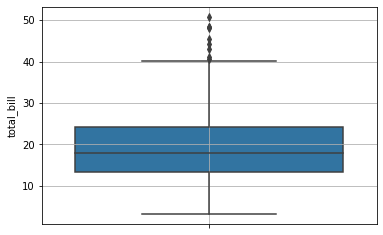

In [ ]:
sns.boxplot(y='total_bill', data=tips)
plt.grid()
plt.show()

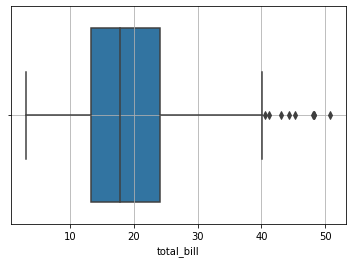

In [ ]:
sns.boxplot(x='total_bill', data=tips)
plt.grid()
plt.show()

성별 tip의 box plot

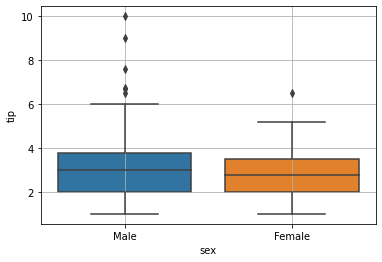

In [ ]:
sns.boxplot(x='sex', y='tip', data=tips)
plt.grid()
plt.show()

In [ ]:
tips[tips.sex == 'Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [ ]:
tips[tips.sex == 'Female'].tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

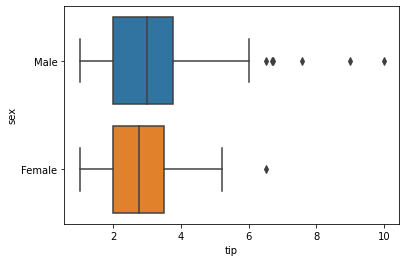

In [ ]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

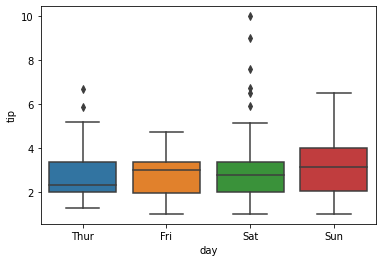

In [ ]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

Subplot을 생성해서 각각 그래프 그리기

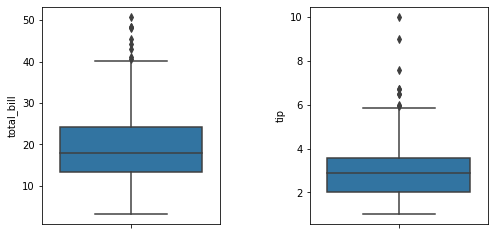

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(y='total_bill', data=tips, ax=ax[0])
sns.boxplot(y='tip', data=tips, ax=ax[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

2개의 Subplot에 흡연여부별 tip, 시간별 tip의 box plot

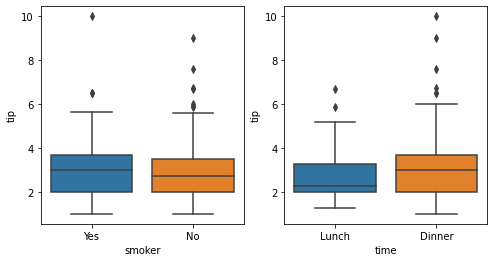

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

total_bill 히스토그램을 세로 막대로 표현

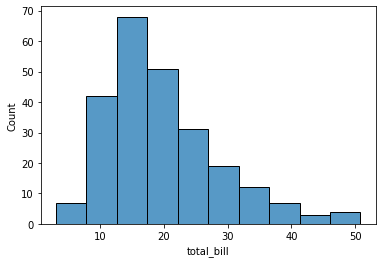

In [ ]:
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

total_bill 히스토그램을 가로 막대로 표현

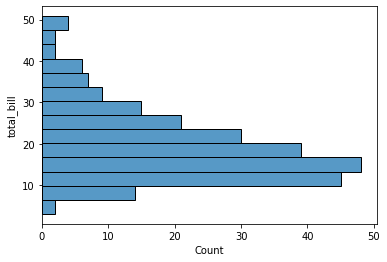

In [ ]:
sns.histplot(data=tips, y='total_bill')
plt.show()

*  Subplot 2개를 상/하로 생성
*  위쪽 Subplot에는 tip의 box plot을 가로 방향으로 그림
*  아래쪽 Subplot에는 tip의 히스토그램을 그림.

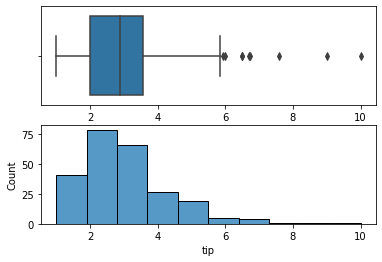

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.boxplot(data=tips, x='tip', ax=ax[0])
sns.histplot(data=tips, x='tip', ax=ax[1], bins=10)

plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수(컬럼)의 빈도수(count, frequency)를 막대로 표현한 그래프

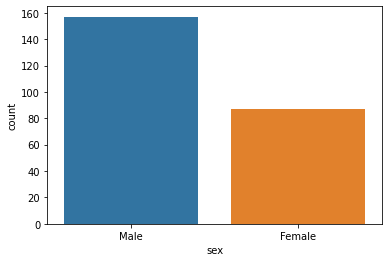

In [ ]:
# 성별 빈도수
sns.countplot(x='sex', data=tips)
plt.show()

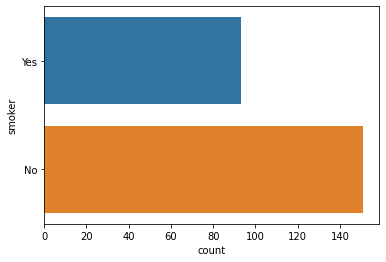

In [ ]:
# 흡연자/비흡연자 가로 막대 그래프
sns.countplot(y='smoker', data=tips)
plt.show()

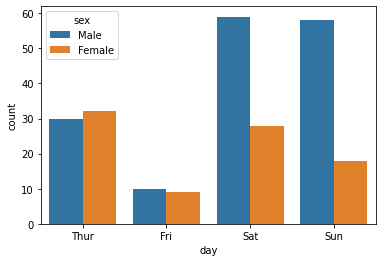

In [ ]:
# 요일별 성별 빈도수
sns.countplot(x='day', hue='sex', data=tips)
# hue 파라미터: 카테고리 별로 색깔을 다르게 시각화할 때
plt.show()

In [ ]:
tips[tips['day'] == 'Thur']['sex'].value_counts()
# tips[tips.day == 'Thue'].sex.value_counts()

Female    32
Male      30
Name: sex, dtype: int64

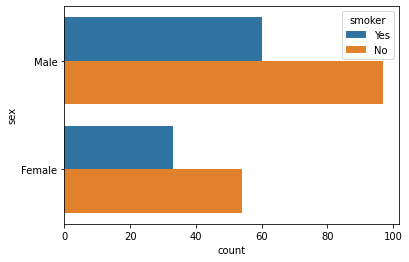

In [ ]:
# 성별 흡연/비흡연자 수 가로 막대 그래프
sns.countplot(y='sex', hue='smoker', data=tips)
plt.show()

In [ ]:
# 남성 흡연/비흡연자 수
tips[tips['sex'] == 'Male']['smoker'].value_counts()

No     97
Yes    60
Name: smoker, dtype: int64

## `barplot()`

*  그룹별 변수(컬럼)의 기술 통계량(평균, 중앙값, 최댓값, ...)을 막대로 시각화.
*  카테고리 타입 변수와 연속형 변수의 통계량을 함께 시각화.


In [ ]:
# 남성 tip의 평균
tips[tips['sex'] == 'Male']['tip'].mean()

3.0896178343949052

In [ ]:
# 여성 tip의 평균
tips[tips.sex == 'Female'].tip.mean()

2.833448275862069

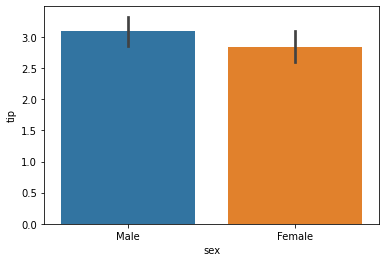

In [ ]:
sns.barplot(x='sex', y='tip', data=tips)
# estimator 파라미터: 연속형 변수의 통계량을 계산할 함수를 지정. 기본값은 mean 함수.
plt.show()

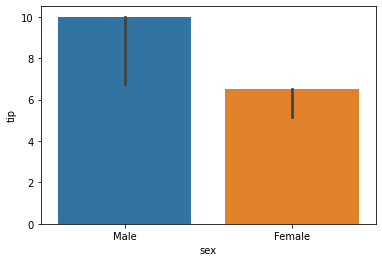

In [ ]:
# 성별 tip의 최댓값
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max, ci=None)
# ci 파라미터: confidence interval(신뢰구간). 기본값은 'sd'.
plt.show()

In [ ]:
tips[tips['sex'] == 'Male']['tip'].max()

10.0

In [ ]:
tips[tips['sex'] == 'Female'].tip.max()

6.5

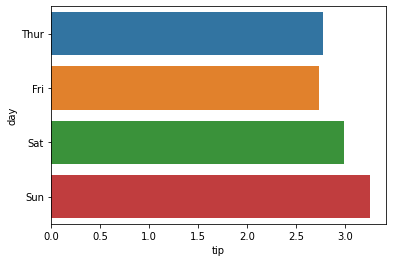

In [ ]:
# 요일별 tip의 평균 가로 막대 그래프
sns.barplot(x='tip', y='day', data=tips, ci=None)
plt.show()

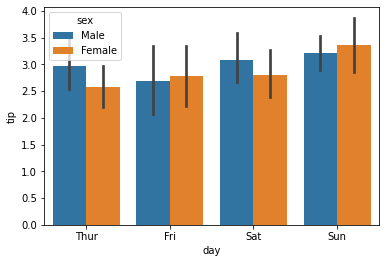

In [ ]:
# 요일별 성별 tip의 평균 세로 막대 그래프
sns.barplot(x='day', hue='sex', y='tip', data=tips)
plt.show()

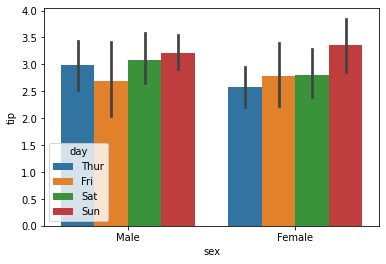

In [ ]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()

# 산점도(Scatter plot)

## `scatterplot()`

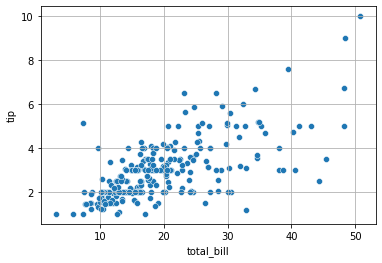

In [ ]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀 직선

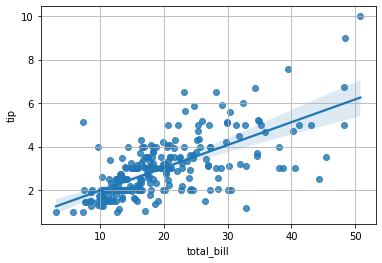

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `jointplot()`

joint plot: 산점도 + 히스토그램

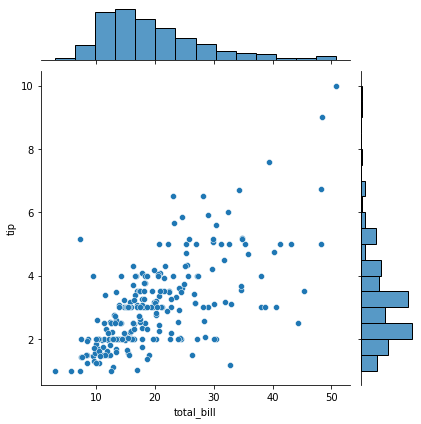

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

tip ~ total_bill 산점도. marker의 색깔을 성별에 따라 다르게 시각화.

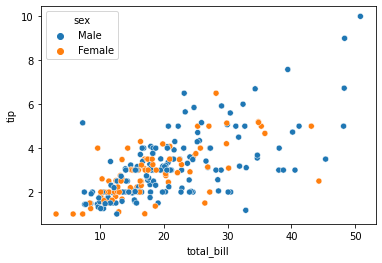

In [ ]:
sns.scatterplot(x='total_bill', y='tip',hue='sex', data=tips)
plt.show()

tip ~ total_bill 산점도. marker의 색깔은 성별에 따라서, marker의 크기를 인원수에 따라서 다르게 시각화.

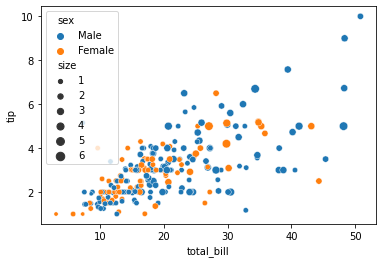

In [ ]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', data=tips)
plt.show()

tip ~ total_bill 산점도. marker 색깔은 성별에 따라서, marker 모양을 흡연여부에 따라서 다르게 시각화.

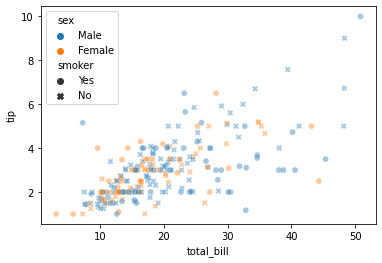

In [ ]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='smoker', data=tips, alpha=0.4)
plt.show()

# Line plot(선 그래프)

In [ ]:
np.random.seed(1)
df = pd.DataFrame({'x1': np.arange(1, 11),
                   'x2': np.random.rand(10)})
df

,x1,x2
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


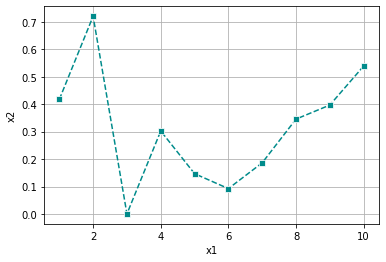

In [ ]:
sns.lineplot(x='x1', y='x2', data=df, marker='s', linestyle='--', color='#008b8b')
plt.grid()
plt.show()

# Category plot

카테고리 별로 Subplot을 생성하고 통계값(평균, 중앙값, ...)을 계산해서, 모든 Subplot에 같은 종류의 그래프들을 시각화하는 방법.

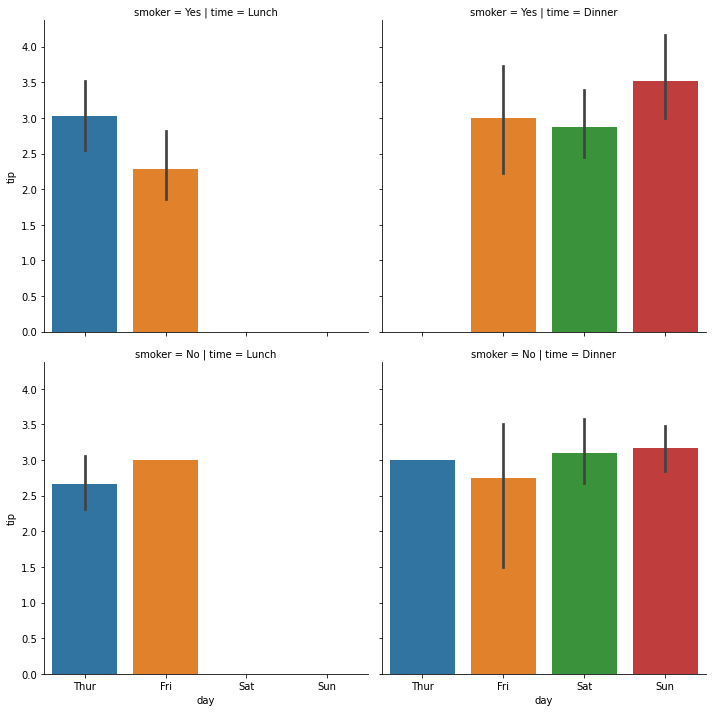

In [ ]:
# 요일(x축)별 tip(y축)의 평균을 막대 그래프(그래프 종류)로 시각화.
# 흡연 여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
sns.catplot(x='day', y='tip', data=tips,
            kind='bar',         # kind=그래프 종류(bar, box, strip, count, ...)
            estimator=np.mean,  # estimator=통계 계산 함수. 기본값은 np.mean.
            row='smoker',       # row=subplot의 행을 나눌 기준이 되는 카테고리 변수(컬럼)
            col='time')         # col=subplot의 열을 나눌 기준이 되는 카테고리 변수(컬럼)
plt.show()

In [ ]:
# 흡연자 점심 시간 목요일의 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Thur')].tip.mean()

3.0299999999999994

In [ ]:
# 흡연자 점심 시간 금요일의 tip의 평균
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Fri')].tip.mean()

2.28

In [ ]:
tips[(tips.smoker == 'Yes') & (tips.time == 'Lunch') & (tips.day == 'Sat')]

,total_bill,tip,sex,smoker,day,time,size


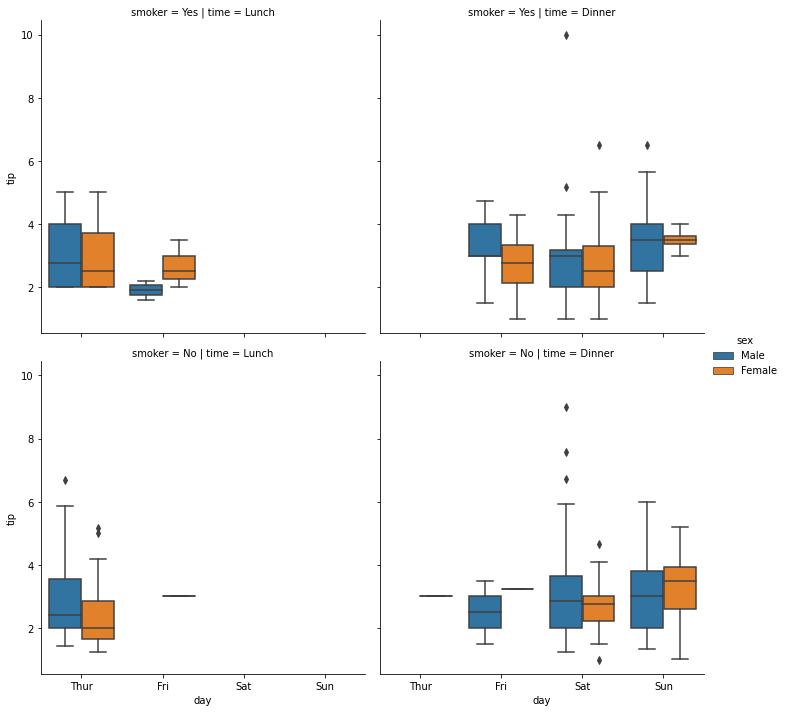

In [ ]:
# 요일(x축)별 tip(y축)의 평균을 box plot(그래프 종류)로 시각화.
# 흡연 여부(subplot의 row)별, 시간(subplot의 column)별로 각각 Subplot들을 생성.
# 막대의 색깔을 성별에 따라서 다르게 시각화.
sns.catplot(x='day', y='tip', data=tips,
            kind='box', row='smoker', col='time', hue='sex')
plt.show()

# Exercise: iris 데이터 셋

*   seaborn 패키지의 예제 데이터 셋 'iris'를 DataFrame으로 생성.
*   데이터 프레임을 탐색 - 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수의 빈도수
*   품종별로 Subplot을 생성해서, 모든 숫자 타입 변수의 box plot을 시각화.
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화.
*   모든 연속형 변수들 간의 상관 관계를 시각화 - Pair plot

## 데이터 셋 준비

In [ ]:
iris = sns.load_dataset('iris')

## 데이터 셋 탐색

In [ ]:
iris.head()  # iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()  # iris.iloc[-5:]

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Box plot

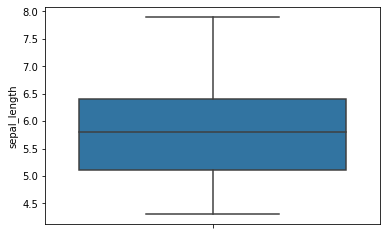

In [ ]:
sns.boxplot(y='sepal_length', data=iris)
plt.show()

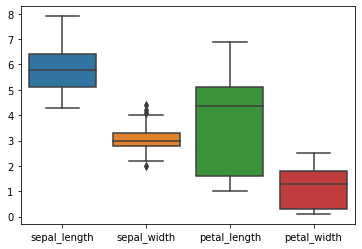

In [ ]:
sns.boxplot(data=iris)
plt.show()

## Category plot

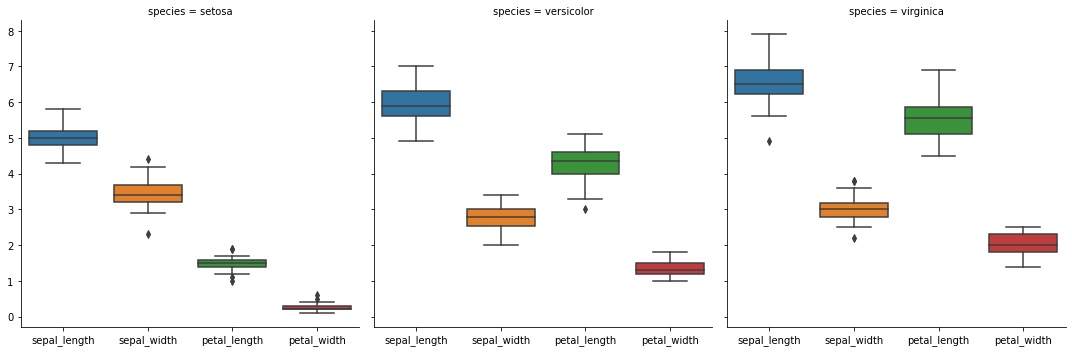

In [ ]:
sns.catplot(data=iris, kind='box', col='species')
plt.show()

## Scatter plot

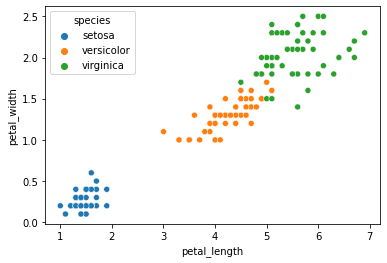

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')
plt.show()

## Pair plot

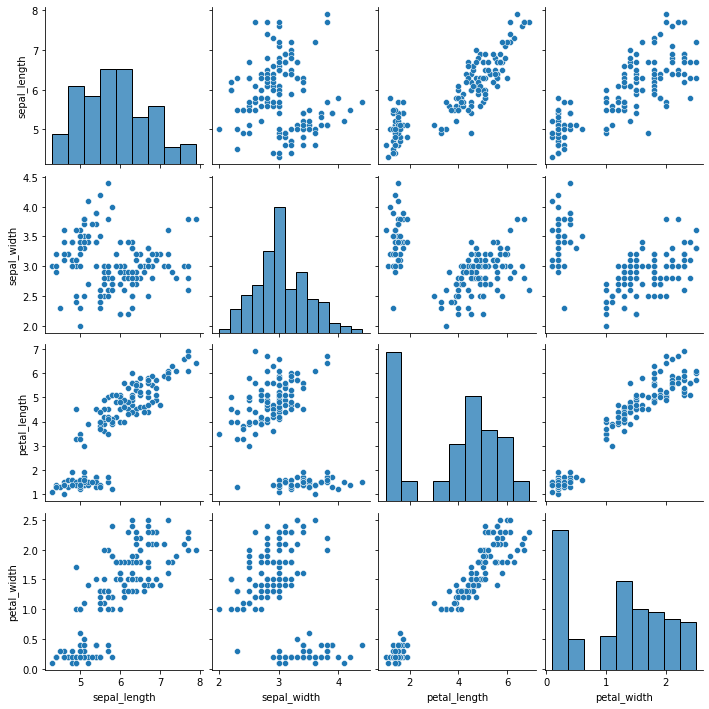

In [ ]:
sns.pairplot(data=iris)
plt.show()

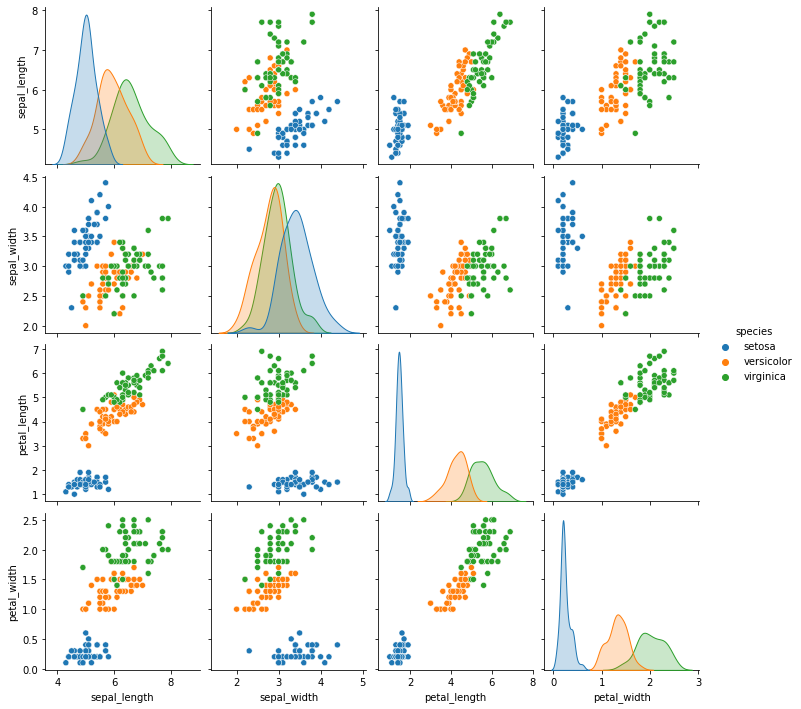

In [ ]:
sns.pairplot(data=iris, hue='species')
plt.show()

# Exercise: mpg 데이터 셋

MPG(Mile Per Gallon): 자동차 연비

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cylinders 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot

In [ ]:
# seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
mpg = sns.load_dataset('mpg')

In [ ]:
# DataFrame 탐색 - 출력
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# DataFrame 탐색 - 요약 정보
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# DataFrame 탐색 - 숫자 타입 기술 통계량
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
# DataFrame 탐색 - 카테고리 타입 빈도수
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

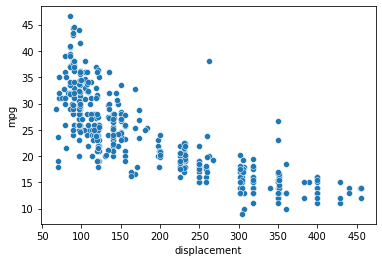

In [ ]:
# 산점도 - mpg(연비) ~ displacement(배기량)
sns.scatterplot(x='displacement', y='mpg', data=mpg)
plt.show()

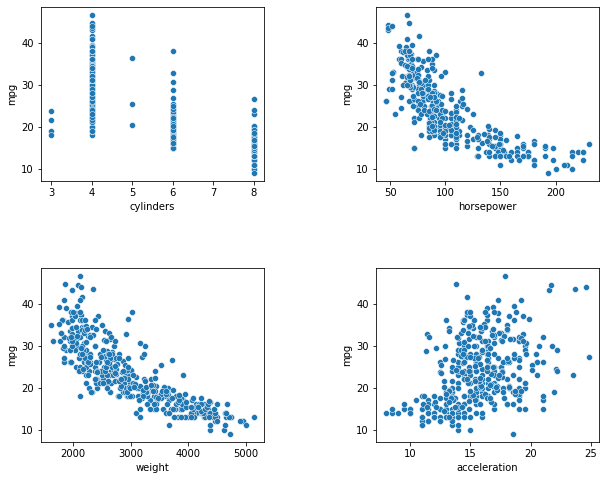

In [ ]:
# 산점도 - 2x2 모양의 subplot을 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# mpg ~ cylinders(실린더 개수)
sns.scatterplot(x='cylinders', y='mpg', data=mpg, ax=ax[0,0])

# mpg ~ horsepower(마력)
sns.scatterplot(x='horsepower', y='mpg', data=mpg, ax=ax[0,1])

# mpg ~ weight(무게)
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=ax[1,0])

# mpg ~ acceleration(가속도)
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=ax[1,1])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

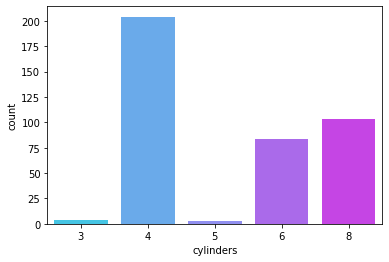

In [ ]:
# 빈도수 막대 그래프 - cylinders 빈도수
sns.countplot(x='cylinders', data=mpg, palette='cool')
plt.show()

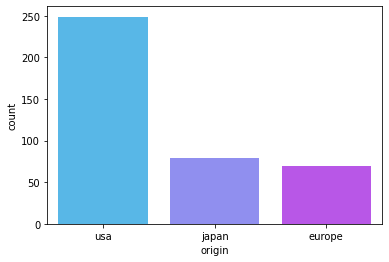

In [ ]:
# 빈도수 막대 그래프 - origin(자동차 생산 지역) 빈도수
sns.countplot(x='origin', data=mpg, palette='cool')
plt.show()

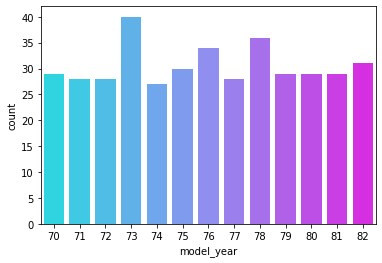

In [ ]:
# 빈도수 막대 그래프 - model_year(자동차 생산 연도) 빈도수
sns.countplot(x='model_year', data=mpg, palette='cool')
plt.show()

In [ ]:
model_year_count = mpg['model_year'].value_counts()

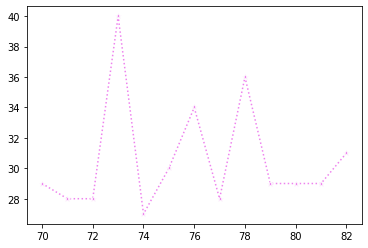

In [ ]:
# 선 그래프 - model_year(자동차 생산 연도) 빈도수
sns.lineplot(x=model_year_count.index, y=model_year_count.values, data=model_year_count,
             marker='*', linestyle=':', color='#EE82EE')
plt.show()

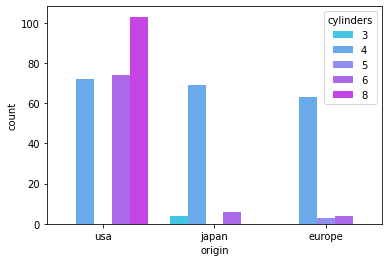

In [ ]:
# 빈도수 막대 그래프 - origin 별, cylinders 별 빈도수
sns.countplot(x='origin', hue='cylinders', data=mpg, palette='cool')
plt.show()

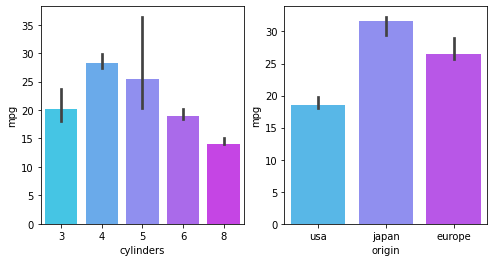

In [ ]:
# 통계량 막대 그래프 - 2개의 subplot 생성
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# cylinders 별 mpg의 중앙값(median)
sns.barplot(x='cylinders', y='mpg', data=mpg, estimator=np.median, ax=ax[0], palette='cool')

# origin 별 mpg의 중앙값
sns.barplot(x='origin', y='mpg', data=mpg, estimator=np.median, ax=ax[1], palette='cool')

plt.show()

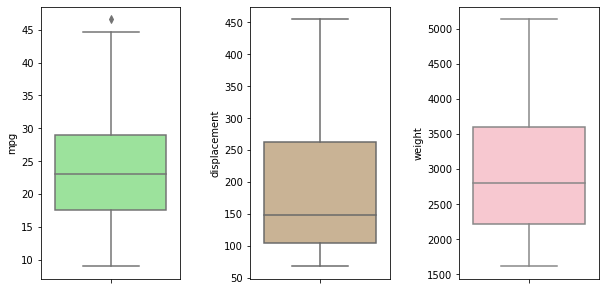

In [ ]:
# Box plot - 3개의 subplot을 생성
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# mpg, displacement, weight box plot
sns.boxplot(y='mpg', data=mpg, color='#90EE90', ax=ax[0])
sns.boxplot(y='displacement', data=mpg, color='#D2B48C', ax=ax[1])
sns.boxplot(y='weight', data=mpg, color='#FFC0CB', ax=ax[2])

plt.subplots_adjust(wspace=0.5)
plt.show()

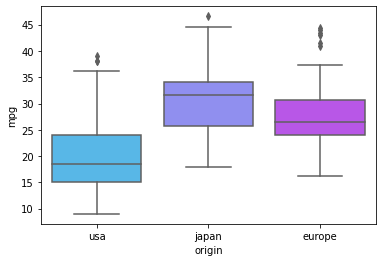

In [ ]:
# Box plot - origin 별 mpg box plot
sns.boxplot(y='mpg', x='origin', data=mpg, palette='cool')
plt.show()

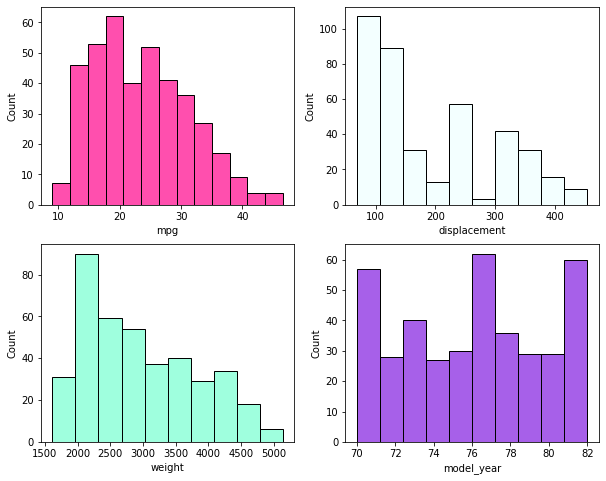

In [ ]:
# Histogram - 4개의 subplot을 생성
fig, ax = plt.subplots(2, 2, figsize=(10,8))

# mpg, displacement, weight, model_year histogram
sns.histplot(x='mpg', data=mpg, ax=ax[0,0], color='#FF1493')
sns.histplot(x='displacement', data=mpg, ax=ax[0,1], color='#F0FFFF')
sns.histplot(x='weight', data=mpg, ax=ax[1,0], color='#7FFFD4')
sns.histplot(x='model_year', data=mpg, ax=ax[1,1], color='#8A2BE2')

plt.show()

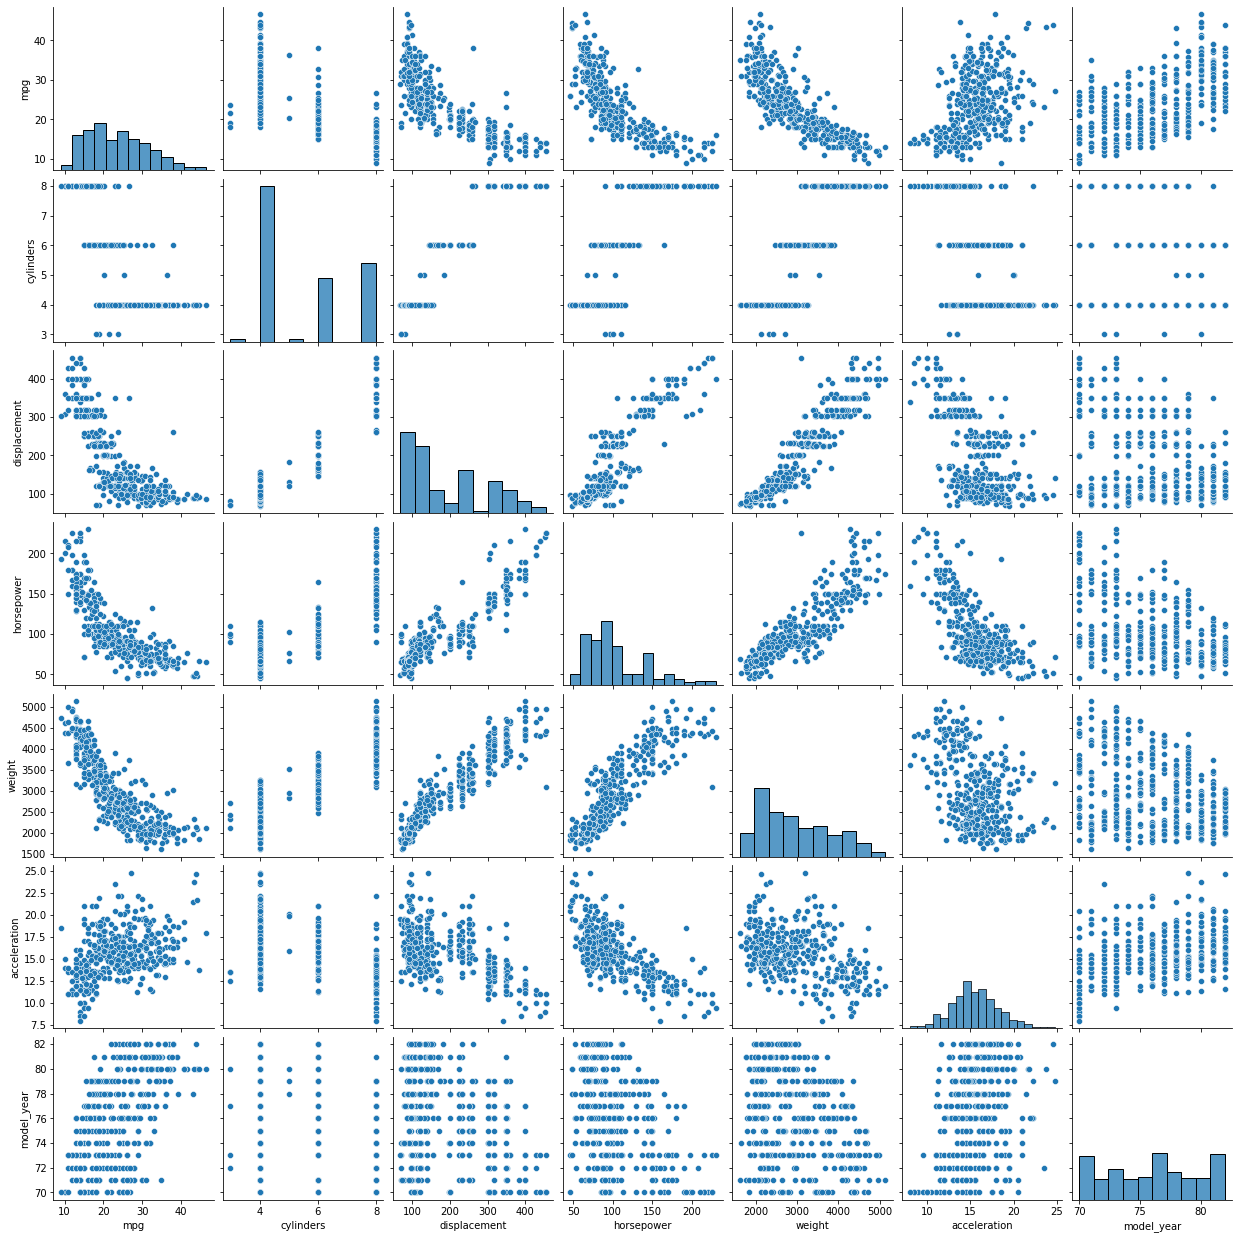

In [ ]:
# Pair plot
sns.pairplot(data=mpg)
plt.show()

## 데이터 셋

In [ ]:
mpg = sns.load_dataset('mpg')

## 데이터 탐색

In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [ ]:
mpg['name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64

In [ ]:
mpg['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [ ]:
mpg['model_year'].value_counts()  # value_counts()의 결과는 value들의 내림차순 순서

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [ ]:
mpg['model_year'].value_counts().sort_index()
# pd.Series.sort_index(), pd.DataFrame.sort_index(): 
# index를 기준으로 오름차순 정렬(ascending 파라미터의 기본값=True).

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

## Scatter plot

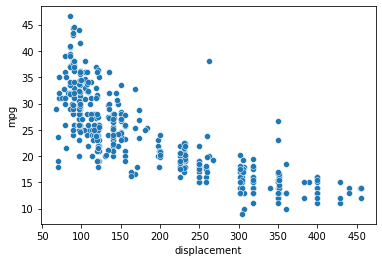

In [ ]:
# mpg ~ displacement
sns.scatterplot(x='displacement', y='mpg', data=mpg)
plt.show()

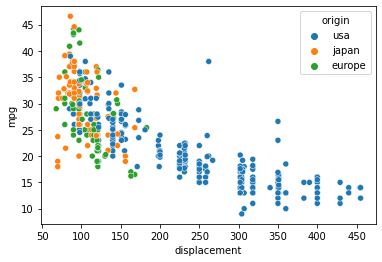

In [ ]:
sns.scatterplot(x='displacement', y='mpg', hue='origin', data=mpg)
plt.show()

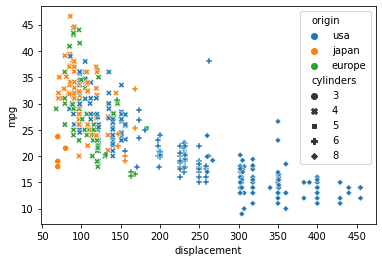

In [ ]:
sns.scatterplot(x='displacement', y='mpg', hue='origin', style='cylinders', data=mpg)
plt.show()

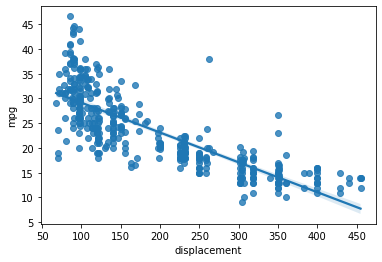

In [ ]:
sns.regplot(x='displacement', y='mpg', data=mpg)
plt.show()

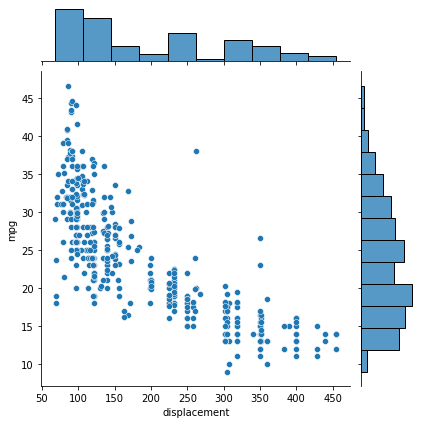

In [ ]:
sns.jointplot(x='displacement', y='mpg', data=mpg)
plt.show()

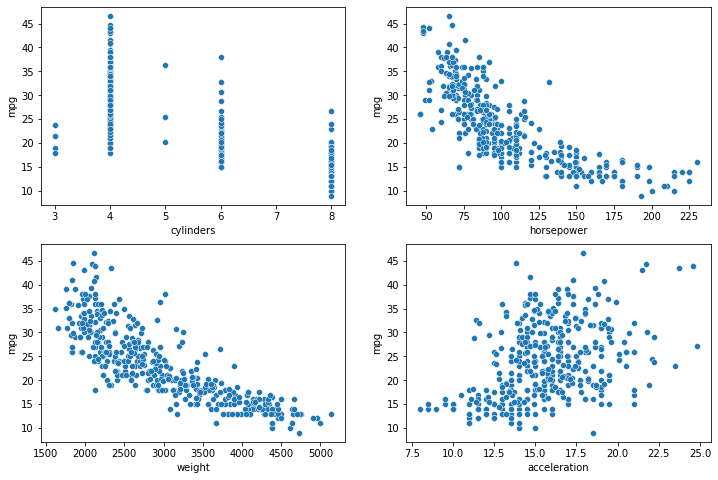

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# print(type(ax), ax.shape)

sns.scatterplot(x='cylinders', y='mpg', data=mpg, ax=ax[0, 0])
sns.scatterplot(x='horsepower', y='mpg', data=mpg, ax=ax[0, 1])
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=ax[1, 0])
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=ax[1, 1])

plt.show()

In [ ]:
print(mpg.columns)
print(mpg.columns[[1, 3, 4, 5]])  # fancy indexing - ndarray, Series, DataFrame

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')
Index(['cylinders', 'horsepower', 'weight', 'acceleration'], dtype='object')


In [ ]:
columns =  mpg.columns[[1, 3, 4, 5]]
for i, col in enumerate(columns):
    print(col, i)
    r_idx = i // 2
    c_idx = i % 2
    print(col, r_idx, c_idx)

cylinders 0
cylinders 0 0
horsepower 1
horsepower 0 1
weight 2
weight 1 0
acceleration 3
acceleration 1 1


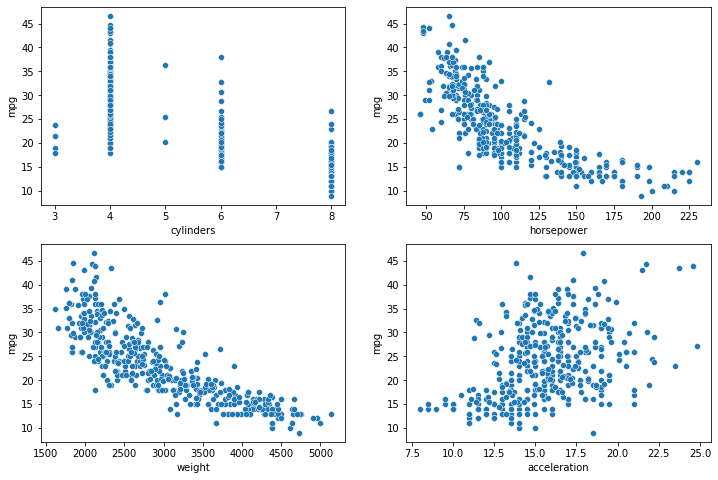

In [ ]:
# scatter plot에서 x축으로 사용할 변수(컬럼)들: [cyl, hp, wt, ac]
columns =  mpg.columns[[1, 3, 4, 5]]

# Figure, Subplot들을 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 각각의 subplot에 scatter plot을 그림.
for i, col in enumerate(columns):
    r_idx, c_idx = i // 2, i % 2
    sns.scatterplot(x=col, y='mpg', data=mpg, ax=ax[r_idx, c_idx])

plt.show()

## countplot

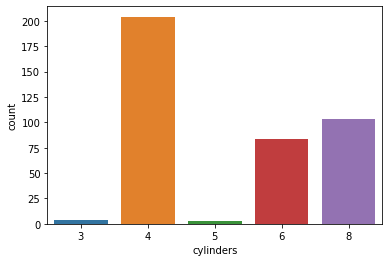

In [ ]:
sns.countplot(x='cylinders', data=mpg)
plt.show()

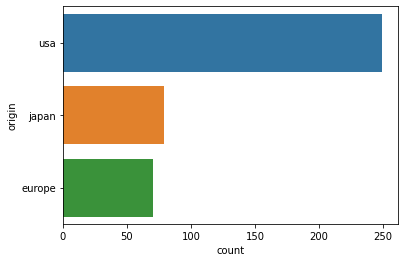

In [ ]:
sns.countplot(y='origin', data=mpg)
plt.show()

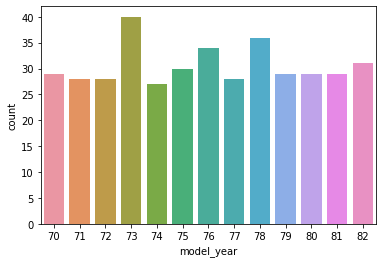

In [ ]:
sns.countplot(x='model_year',data=mpg)
plt.show()

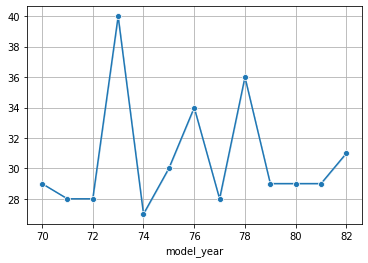

In [ ]:
sns.lineplot(x='model_year', data=mpg, estimator=np.size, marker='o')
plt.grid()
plt.show()

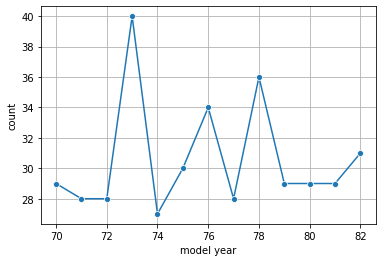

In [ ]:
year_counts = mpg['model_year'].value_counts()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.grid()
plt.xlabel('model year')
plt.ylabel('count')
plt.show()

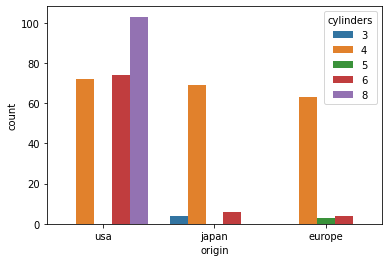

In [ ]:
sns.countplot(x='origin', hue='cylinders', data=mpg)
plt.show()

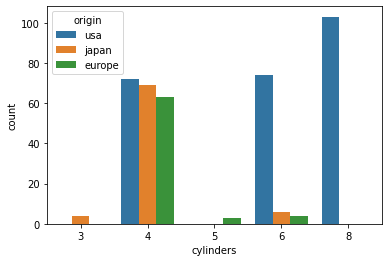

In [ ]:
sns.countplot(x='cylinders', hue='origin', data=mpg)
plt.show()

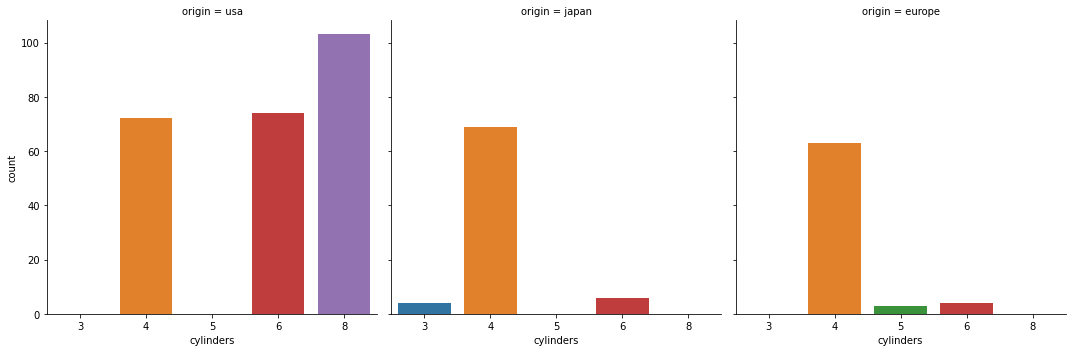

In [ ]:
sns.catplot(x='cylinders', col='origin', data=mpg, kind='count')
plt.show()

## bar plot

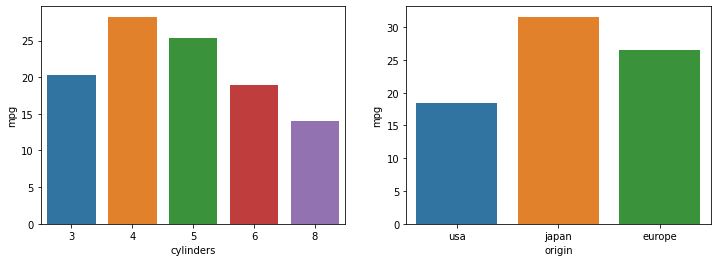

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

sns.barplot(x='cylinders', y='mpg', data=mpg, estimator=np.median, ax=ax[0], ci=None)
sns.barplot(x='origin', y='mpg', data=mpg, estimator=np.median, ax=ax[1], ci=None)

plt.show()

## box plot

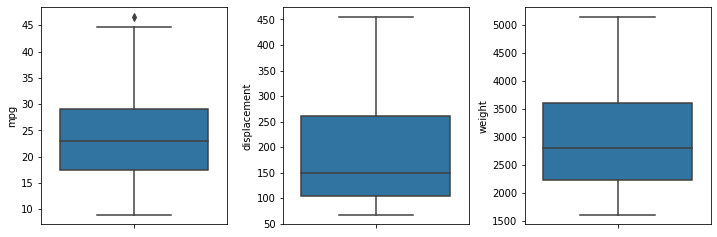

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# sns.boxplot(y='mpg', data=mpg, ax=ax[0])
# sns.boxplot(y='displacement', data=mpg, ax=ax[1])
# sns.boxplot(y='weight', data=mpg, ax=ax[2])

columns = mpg.columns[[0, 2, 4]]  # [mpg, disp, wt]
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=mpg, ax=ax[i])

plt.subplots_adjust(wspace=0.3)
plt.show()

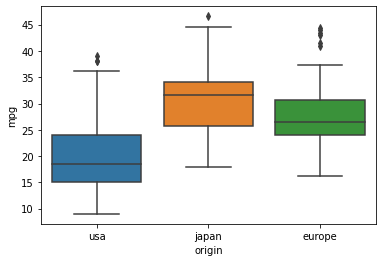

In [ ]:
# origin별 mpg의 box plot
sns.boxplot(x='origin', y='mpg', data=mpg)
plt.show()

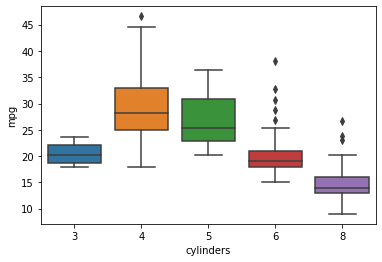

In [ ]:
# cylinders 별 mpg의 box plot
sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.show()

### catplot

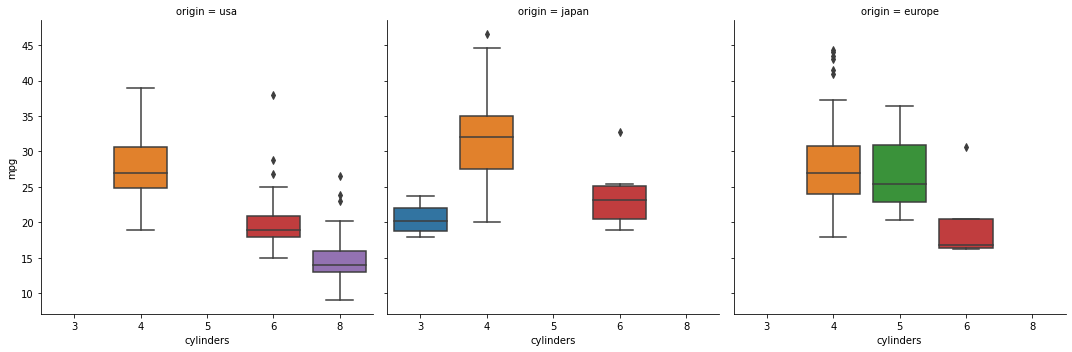

In [ ]:
# origin별, cylinders 별 mpg의 box plot
sns.catplot(x='cylinders', y='mpg', col='origin', data=mpg, kind='box')
plt.show()

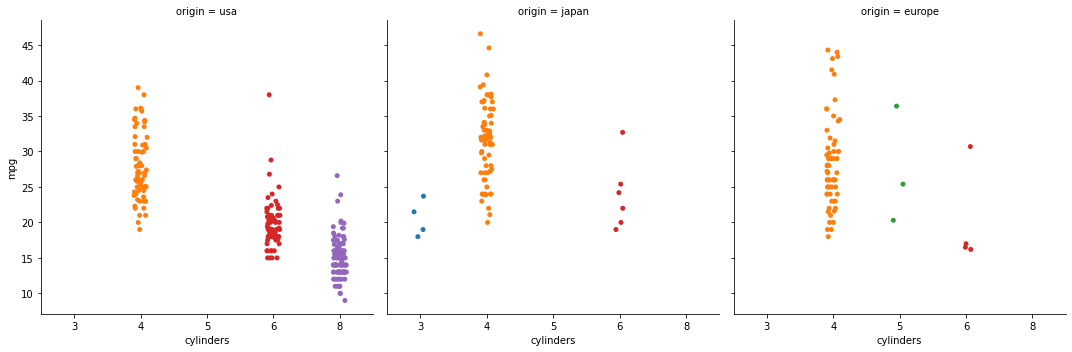

In [ ]:
sns.catplot(x='cylinders', y='mpg', col='origin', data=mpg)
# catplot에서 kind 파라미터(그래프 종류)를 지정하지 않으면 point들을 그려줌.
plt.show()

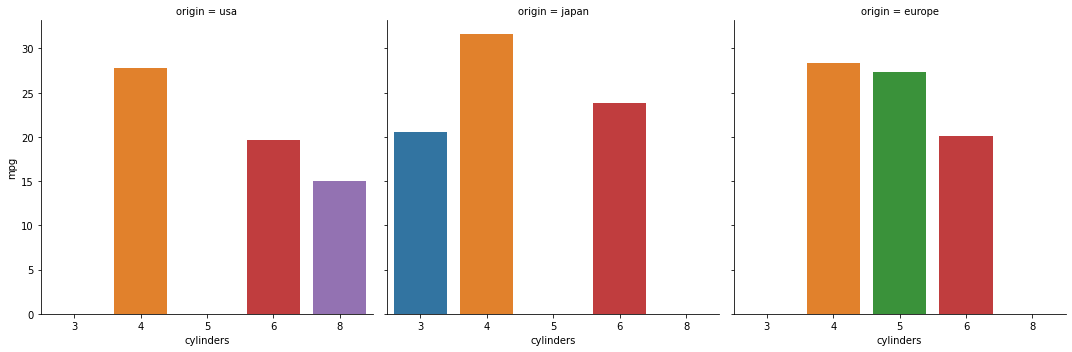

In [ ]:
# origin 별, cylinders 별 mpg의 평균 막대 그래프.
sns.catplot(x='cylinders', y='mpg', col='origin', data=mpg, kind='bar', ci=None)
# estimator 기본값은 np.mean
plt.show()

## Histogram

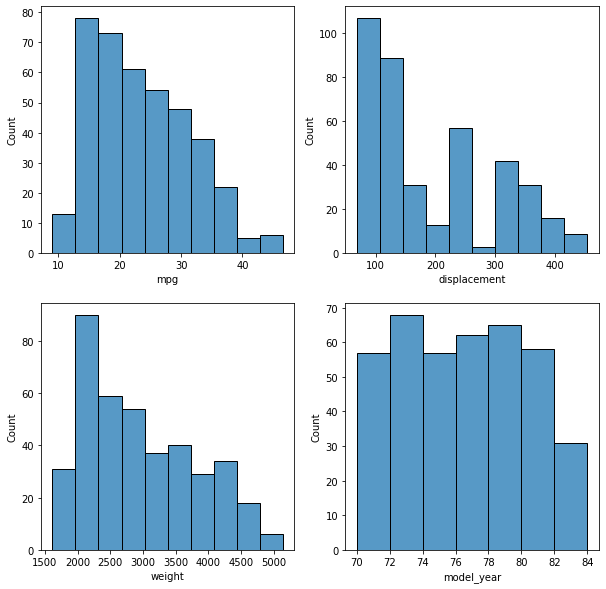

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(data=mpg, x='mpg', ax=ax[0, 0], bins=10)
sns.histplot(data=mpg, x='displacement', ax=ax[0, 1])
sns.histplot(data=mpg, x='weight', ax=ax[1, 0])
sns.histplot(data=mpg, x='model_year', ax=ax[1, 1], bins=np.arange(70, 86, 2))
# bins=np.arange(70, 84) -> countplot과 비슷한 결과

plt.show()

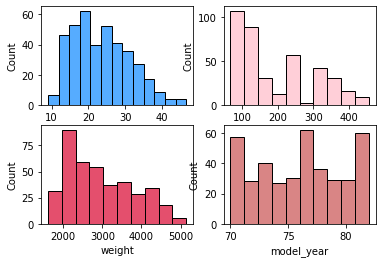

In [ ]:
columns = mpg.columns[[0, 2, 4, 6]]
colors = ['dodgerblue', 'pink', 'crimson', 'indianred']

fig, ax = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(columns):
    r_idx, c_idx = i // 2, i % 2
    sns.histplot(data=mpg, x=col, ax=ax[r_idx, c_idx], color=colors[i])

plt.show()

## Pair plot

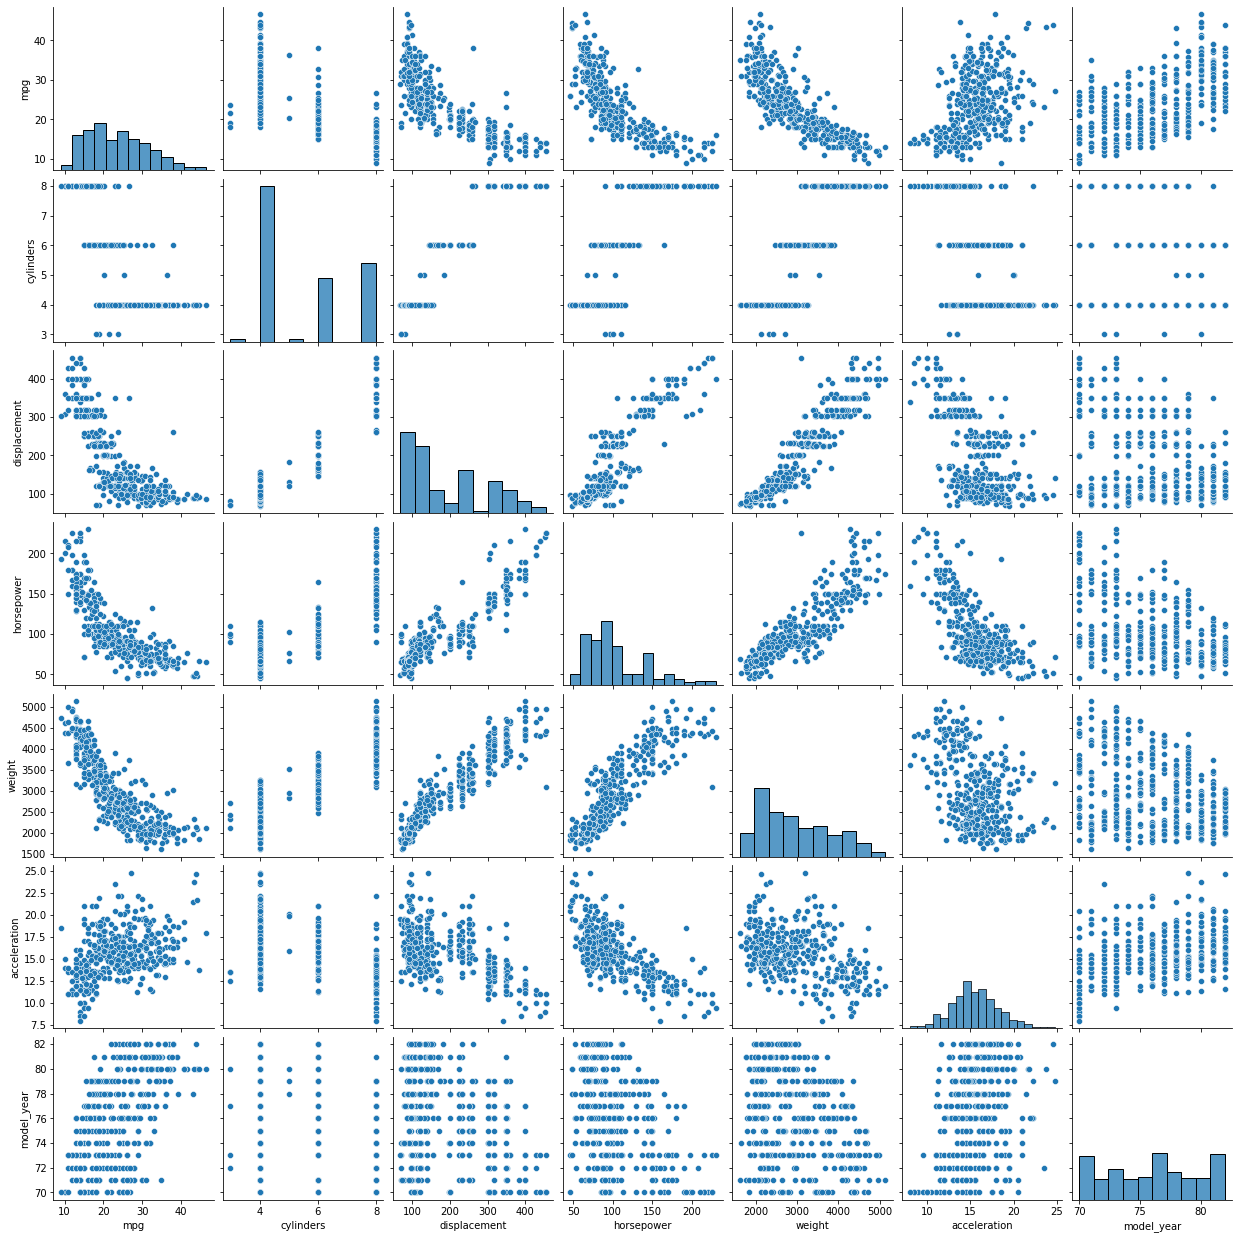

In [ ]:
sns.pairplot(data=mpg)
plt.show()

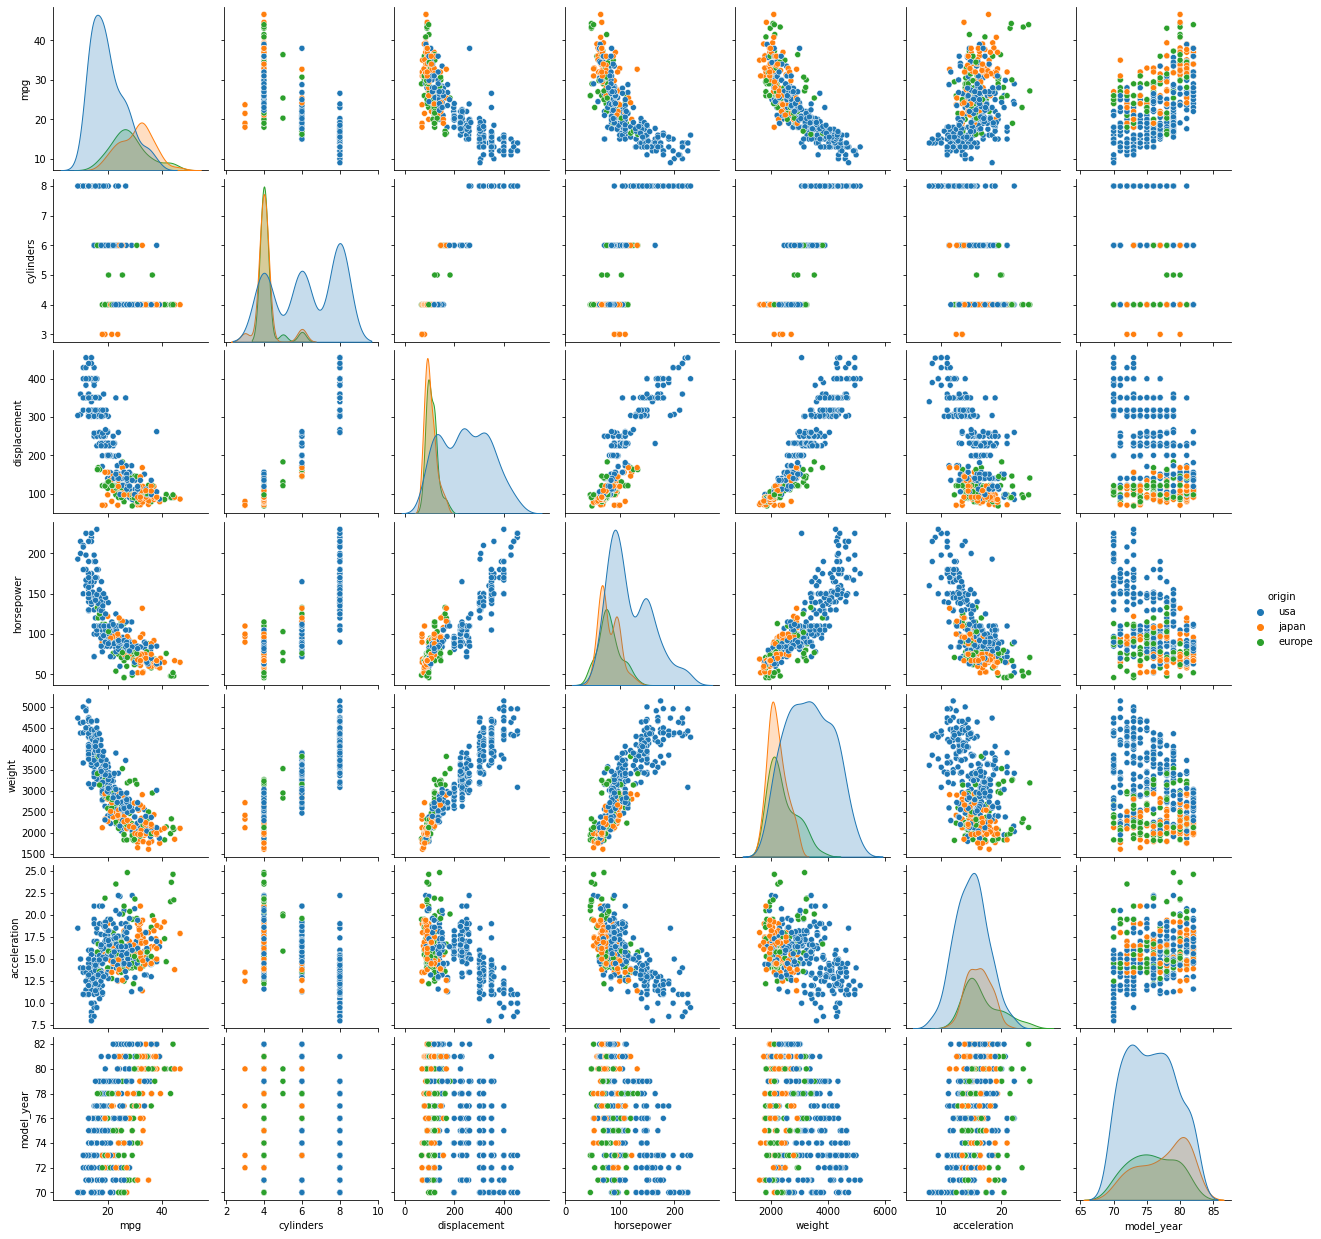

In [ ]:
sns.pairplot(data=mpg, hue='origin')
plt.show()

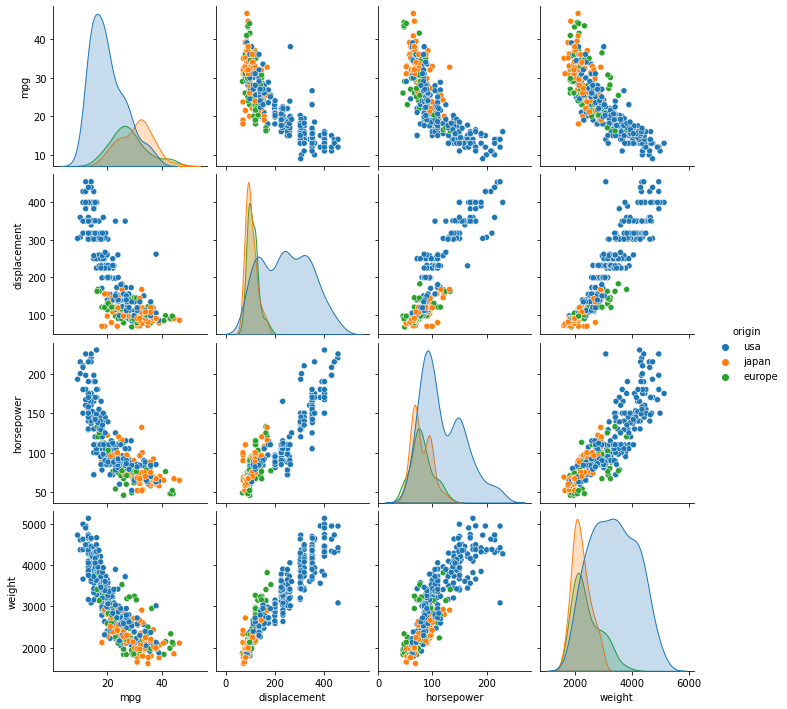

In [ ]:
sns.pairplot(data=mpg, hue='origin', 
             vars=['mpg', 'displacement', 'horsepower', 'weight'])
plt.show()